# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Castro, Denise Kyla \
_Student No._: 2022-10832\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: October 6, 2024 - 1:05 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Denise Kyla B. Castro

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

 To find the eigenvalues and eigenvectors of matrix  $\bf A$, the NumPy library was used to import the functions array and eigh. The array function was utilized to make an array representation of matrix $\bf A$. As for the function eigh, it was used to determine the eigenvalues and eigenvectors of $\bf A$, with their variables set to $\bf x$ and $\bf V$ respectively.

In [102]:
# 1. Finding the eigenvalues and eigenvectors
import numpy as np                                              # library for arrays
from numpy.linalg import eigh                                   # imports eigh function from linalg module

A = array([[8,-2,-20], [-2,-3,-9],[-20,-9,-3]])                 # define the matrix
x,V = eigh(A)                                                   # computes eigenvalues and eigenvectors of a hermitian symmetric matrix
print('The eigenvalues are: \n',x)                              # prints eigenvalues
print('The eigenvectors are: \n', V)                            # prints eigenvectors

The eigenvalues are: 
 [-21.99606195   0.16021522  23.83584674]
The eigenvectors are: 
 [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


In validating the relationship between $\bf AV$ and $\bf VD$, their difference should be $\bf AV-\bf VD = 0$. To validate this, $\bf D$ was first determined by constructing a diagonal array using the eigenvalues contained in $\bf x$ with the np.diag function from NumPy. After obtaining the results, the np.linalg.norm function was used to calculate the frobenius norm of the difference between $\bf AV$ and $\bf VD$. Their difference indicates how far the values of $\bf AV$ and $\bf VD$ are from each other. 

In [97]:
# 2. Checking AV = VD

D = np.diag(x)                                                  # makes a diagonal matrix for the eigenvalues

difference = np.linalg.norm(A@V-V@D, ord='fro')                 # calculates the frobenius norm of AV-VD to calculate their difference
print('The frobenius norm of the difference between AV and VD is',difference)         # prints out difference of AV and VD

The frobenius norm of the difference between AV and VD is 1.0062470435508362e-14


The computed difference is a very small number close to zero, likely due to numerical errors in the computation process of the code. We can remedy this by rounding off the resulting dot product of $\bf AV$ and $\bf VD$.

In [98]:
# Remedy of difference
difference = np.linalg.norm(np.round(A@V,10)-np.round(V@D,10), ord='fro')
print('The frobenius norm of the rounded-off difference between AV and VD is',difference)

The frobenius norm of the rounded-off difference between AV and VD is 0.0


Thus, this validates the relationship between $\bf AV$ and $\bf VD$ to be equal.

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

To apply the relaxation method to the function $f(x) = 1 - e^{-cx}$, the derivative of the function is required. The SymPy library can be used to symbolically differentiate the function. By defining $x$ as a symbolic variable using sp.Symbol, it becomes possible to differntiate $f(x)$ with respect to $x$. The variable $f2$ contains the result of sp.diff function, which takes the derivative of $f1$ with respect to $x$. However, $f2$ is only a symbolic derivative which is not suitable for numeric evaluations, thus we need to convert it to numerical form using sp.lambdify to calculate numerical values. 

Additionally, a while loop was utilized to implement the relaxation method to iteratively update the value of $x$. The loop continues as long as the magnitude of the error is greater than the accuracy ($10^{-6}$). With each iteration, the updated value of $x$, referred to as $x_{new}$ is calculated. The process halts once the error becomes sufficiently small. 

For #2, the steps are similar to those in #1, with the main difference being that the $c$ values are contained in an array generated using the np.arange function, ranging from 0 to 3 in increments of 0.01. A for loop is employed to iterate through each value of $c$, appending the resulting value of $x$ to an initially empty list using x_values.append(x).

x = 0.7968126311118457


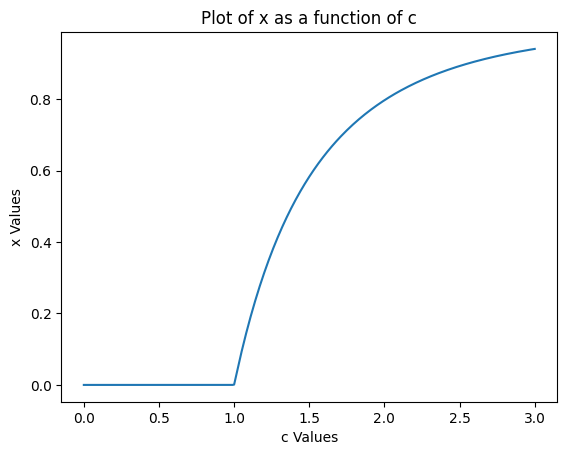

In [99]:
# 1
import sympy as sp                                          # library for symbolic computations
from math import exp                                        # imports exp function 

x = sp.Symbol('x')                                          # creates symbolic variable x
c = 2                                                       # given parameter

f1 = 1-sp.exp(-c*x)                                         # define f(x)
f2 = sp.diff(f1,x)                                          # take derivative of f(x) using sympy lib

derivative = sp.lambdify(x,f2)                              # convert symbolic derivative to numerical form

x = 1.0                                                     # initial guess
accuracy = 1e-6                                             # accuracy
error = 1.0                                                 # initialize error

while abs(error)>accuracy:                                  # loop while error is greater than accuracy
    x_old = x                                               # use x_old as x in f(x)
    x = 1-exp(-c*x_old)                                     
    x_new = x                                               # the previous line's value becomes x_new
    error = (x_old-x_new)/(1-1/derivative(x_old))           # error of the relaxation method
print('x =',x_new)                                          # print final value of x after convergence

# 2

import numpy as np                                          # library for arrays
import matplotlib.pyplot as plt                             # library for plots

c_values = np.arange(0,3.01,0.01)                           # creates an array from 0 to 3.00 with increments 0.01
x_values = []                                               # empty list to place x_values in the latter part of the code

for c in c_values:                                          # loop for every c value
    x = 1.0                                                 # initial guess
    error = 1.0                                             # initialize error

    while abs(error) > accuracy :                           # loop while error is greater than accuracy
        x_old = x                                           # use x_old as x in f(x)
        x = 1 - exp(-c * x_old)                             
        x_new = x                                           # the previous line's value becomes x_new
        error = (x_old-x_new) / (1 - 1 / derivative(x_old)) # error of the relaxation method
    x_values.append(x)                                      # appends the values to the empty list earlier

plt.plot(c_values,x_values)                                 # plots c_values in the x-axis and x_values in the y-axis
plt.title('Plot of x as a function of c')                   # plot title
plt.xlabel('c Values')                                      # x-label
plt.ylabel('x Values')                                      # y-label
plt.show()                                                  # shows plot

The graph shows that the behavior of the function varies with different values of $c$. For $c < 1$, the graph shows a flatline near the x-axis as $x$ converges to 0, which aligns with the given equation since the exponential term $e^{-cx}$ remains close to 1. Moreover, as $c$ increases past 1, $x$ begins to rapidly rise, converging to values between 0 and 1 which reflects an exponential-like growth. At larger values of $c$, the graph shows $x$ approaching 1 as $e^{-cx}$ decays nearly to 0, leaving $x \approx 1$. These results are consistent with the mathematical expectations of the given equation.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

To use Newton's method, we make use of the formula

$$ \begin{equation*}
r' = r - \Delta r = r - \frac{f(r)}{f'(r)}
\end{equation*} $$


where $\Delta r = \frac{f(r)}{f'(r)}$, which takes in an initial guess $r$ of the root of a function $f(r)$ and uses the slope $f'(r)$ at that point to extrapolate a better estimate $r'$ of the root.

In solving the distance $r$ from the Earth to the moon, we consider the function

$$ \begin{equation*}
f(r) = \frac{GM}{r^2} - \frac{Gm}{(R-r)^2} - \omega^2 r
\end{equation*} $$

and its derivative

$$ \begin{equation*}
f'(r) = \frac{-2GM}{r^3} - \frac{2Gm}{(R-r)^3} - \omega^2
\end{equation*} $$

Using these functions, a better estimate $r'$ for the distance can be calculated by assuming an initial guess for $r$. 

In this code, a while loop was utilized to execute Newton's method using the equations discussed above.


In [100]:
G = 6.674*1e-11                 # newton's gravitational constant
M = 5.974*1e24                  # earth mass
m = 7.348*1e22                  # moon mass
R = 3.844*1e8                   # distance from the earth to the moon
w = 2.662*1e-6                  # angular velocity of both the moon and the satellite

def f(r) :                      # define function
    return (G*M)/r**2 - G*m/(R-r)**2 - r*w**2

def f_prime(r) :                # define derivative of function
    return (-2*(G*M)/r**3) - (2*(G*m)/((R-r)**3)) - w**2

accuracy = 1e-4                 # accuracy
r = 1.0                         # initial guess
delta = 1.0                     # initialize delta

while abs(delta) > accuracy :   # loop while delta is greater than accuracy
   delta = f(r)/f_prime(r)      # derived from slope (derivative)
   r -= delta                   # subtract delta to initial guess
print("The distance from the Earth to the L1 point is r' = ",r, 'meters') # print r value



The distance from the Earth to the L1 point is r' =  326045071.66535544 meters


The distance of the Earth to the Moon is around 384 400 km (Royal Museums Greenwich, 2018) and the distance of the Earth to $L_1$ in the Earth-Moon system is around 84.9% of the distance of the Earth to the Moon ("Lagrange point," 2024) which is 326 355.6 km. 

In [123]:
r_theo = 384400*0.849                                   # theoretical distance of center of earth and l1
#print(r_theo)                                           
r_km = r*0.001                                          # converts r from meters to kilometers
#print(r_km)

percent_error = ((r_theo - r_km)/r_theo)*100            # computes for the % error
print('The percent error is ',percent_error,'%')        # prints the % error

The percent error is  0.09515030066728034 %


This small error may be due to floating-point rounding error during the computation process.

References:

Lagrange point. (2024, August 30). In Wikipedia. https://en.wikipedia.org/wiki/Lagrange_point

Royal Museums Greenwich. (2018). How far away is the Moon? Royal Museums Greenwich. https://www.rmg.co.uk/stories/topics/how-far-away-moon